In [148]:
#Imports
import pandas
import plotnine
from scipy.stats import ttest_ind
import matplotlib

#Reads
clima_data = pandas.read_csv('./data/clima_cg_jp-semanal.csv')
clima_data.sort_values(by=['semana'])
clima_data['tmedia_lag'] = clima_data['tmedia'].shift(1) #lag column

meses = ["Jan", "Fev", "Mar", "Abril", "Maio", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
clima_data['mes_nome'] = clima_data['mes'].apply(lambda x: meses[x-1])

pandas.Categorical(clima_data['mes_nome'], categories=meses, ordered=True)


clima_jp = clima_data.loc[clima_data["cidade"]=="João Pessoa"]
clima_cg = clima_data.loc[clima_data["cidade"]=="Campina Grande"]
clima_jan_fev = clima_data.loc[(clima_data["mes"]==1) | (clima_data["mes"]==2)]
clima_data

,cidade,semana,tmedia,tmax,tmin,chuva,mes,ano,tmedia_lag,mes_nome
0,Campina Grande,1992-12-27T00:00:00Z,26.133333,30.4,20.7,0.0,12,1992,NaN,Dez
1,Campina Grande,1993-01-03T00:00:00Z,26.119048,32.4,19.3,0.0,1,1993,26.133333,Jan
2,Campina Grande,1993-01-10T00:00:00Z,25.766667,32.2,19.7,0.0,1,1993,26.119048,Jan
3,Campina Grande,1993-01-31T00:00:00Z,25.740000,32.0,19.9,0.4,1,1993,25.766667,Jan
4,Campina Grande,1993-02-07T00:00:00Z,26.314286,32.7,19.6,0.3,2,1993,25.740000,Fev
...,...,...,...,...,...,...,...,...,...,...
2743,João Pessoa,2019-02-17T00:00:00Z,29.533333,32.6,23.1,0.0,2,2019,28.219048,Fev
2744,João Pessoa,2019-02-24T00:00:00Z,29.716667,32.4,23.3,12.8,2,2019,29.533333,Fev
2745,João Pessoa,2019-03-03T00:00:00Z,29.666667,32.8,24.5,6.9,3,2019,29.716667,Mar
2746,João Pessoa,2019-03-10T00:00:00Z,29.833333,33.2,23.1,13.1,3,2019,29.666667,Mar


### Q1: Qual a cidade é mais quente? Isso muda se considerarmos apenas o período de janeiro e fevereiro (pico do verão)? 

Utilizando os dados fornecidos, especificamente a temperatura média é possível observar pelo boxplot **Temperatura Média por cidade** que de maneira geral as temperaturas de joão pessoa são mais elevadas que as temperaturas de campina grande. Tendo pela tabela abaixo que a média de temperatura de campina grande é de 24.5°, já em joão pessoa temos a uma média de 27.5°.

In [28]:
clima_data.groupby(["cidade"])["tmedia"].describe()

,count,mean,std,min,25%,50%,75%,max
cidade,,,,,,,,
Campina Grande,1224.0,24.690773,1.525646,20.773333,23.521190,24.995238,25.869048,28.566667
João Pessoa,1524.0,27.653177,1.180293,23.992857,26.786905,27.838095,28.566667,30.114286


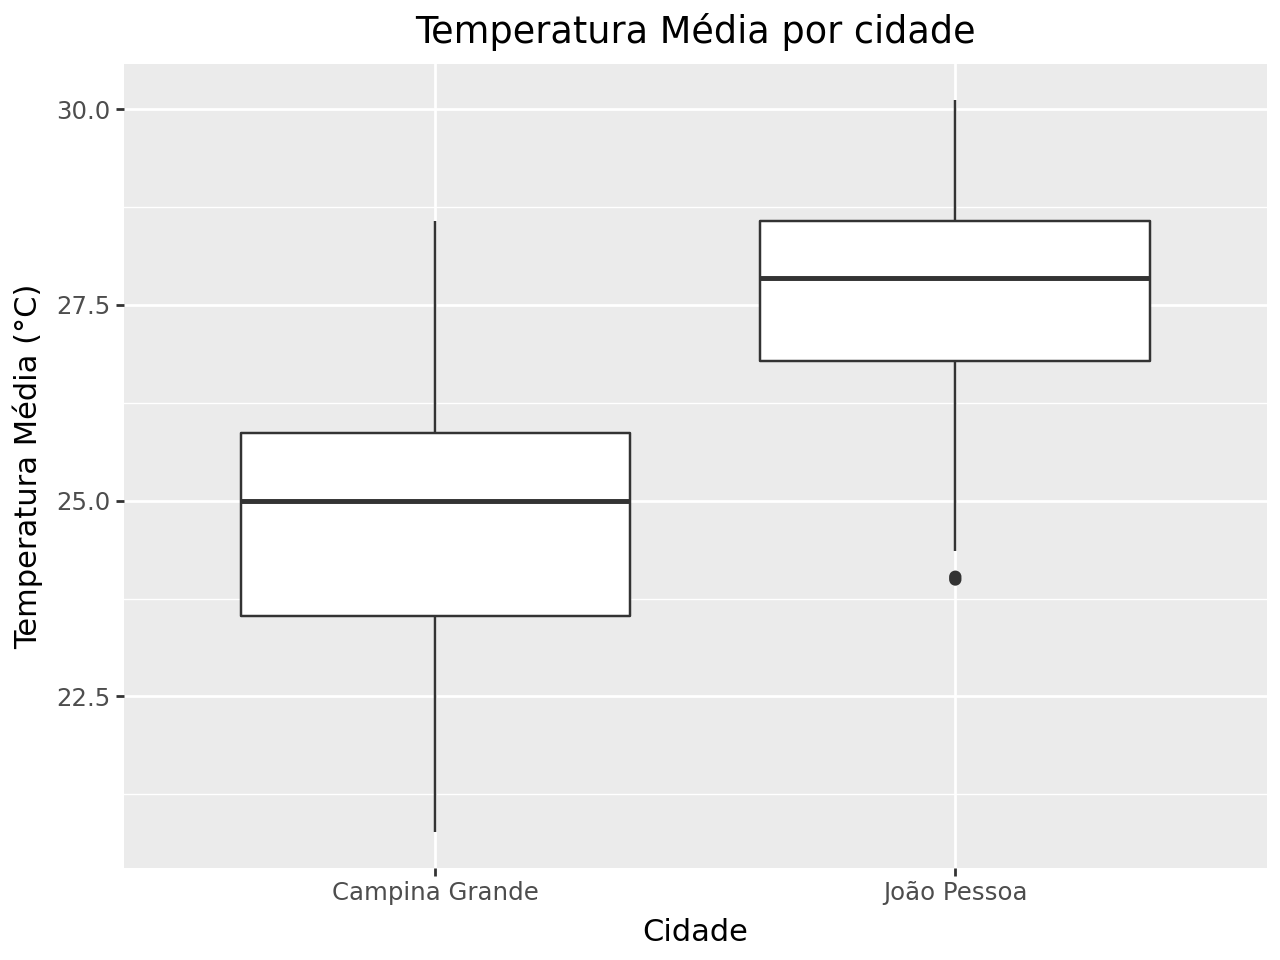

In [150]:
(plotnine.ggplot(clima_data) + 
     plotnine.aes(x='cidade',y='tmedia') + 
     plotnine.geom_boxplot() + 
     plotnine.xlab("Cidade") + 
     plotnine.ylab("Temperatura Média (°C)") +
     plotnine.ggtitle("Temperatura Média por cidade") 
    )

Já considerando o gráfico e a tabela de janeiro e fevereiro ambas as cidades ficam mais quentes mas joão pessoa ainda se mantém a mais quente das duas. Campina Grande com média de 25.85° e João pessoa com 28.68°. É possível observar que ambos os boxplots tiveram a redução do tamanho das suas caixas indicando que realmente as temperaturas mais altas se encontram nessa região. Principalmente no caso de João pessoa.

In [29]:
clima_jan_fev.groupby(["cidade"])["tmedia"].describe()

,count,mean,std,min,25%,50%,75%,max
cidade,,,,,,,,
Campina Grande,217.0,25.855466,0.903774,22.980952,25.314286,25.947619,26.509524,27.971429
João Pessoa,254.0,28.650269,0.586677,26.609524,28.286905,28.728571,29.038095,30.085714


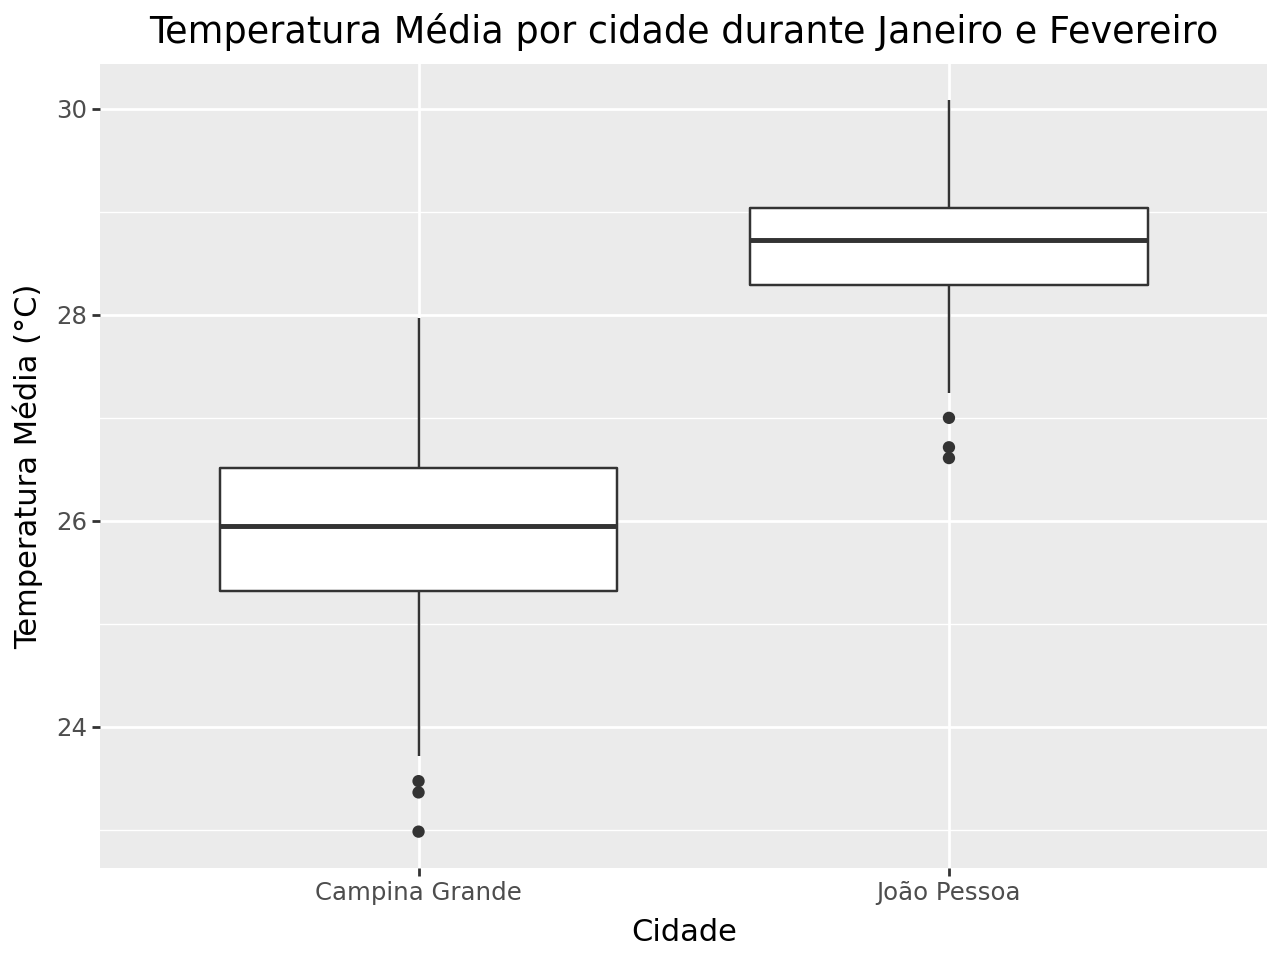

In [149]:

(plotnine.ggplot(clima_jan_fev) + 
     plotnine.aes(x='cidade',y='tmedia') + 
     plotnine.geom_boxplot() + 
     plotnine.xlab("Cidade") + 
     plotnine.ylab("Temperatura Média (°C)") +
     plotnine.ggtitle("Temperatura Média por cidade durante Janeiro e Fevereiro") 
    )


### Q2: Quais os meses mais quentes e mais frios? Como você descreveria a temperatura das festas juninas das cidades nos últimos anos?

In [82]:
clima_data.groupby(["mes_nome","cidade"])["tmedia"].describe()

count       mean       std        min        25%  \
mes_nome cidade                                                             
Abril    Campina Grande  102.0  25.261699  0.965366  23.533333  24.583333   
         João Pessoa     121.0  28.299648  0.790065  26.447619  27.771429   
Ago      Campina Grande   98.0  22.748738  0.704591  20.876190  22.211905   
         João Pessoa     131.0  26.240365  0.607803  24.657143  25.911905   
Dez      Campina Grande  104.0  25.943982  0.624090  24.121429  25.538810   
         João Pessoa     130.0  28.463346  0.478173  26.276190  28.232540   
Fev      Campina Grande  104.0  25.885253  0.932458  23.719048  25.259524   
         João Pessoa     121.0  28.784720  0.572961  27.333333  28.514286   
Jan      Campina Grande  113.0  25.828050  0.879819  22.980952  25.390476   
         João Pessoa     133.0  28.527948  0.574118  26.609524  28.171429   
Jul      Campina Grande   97.0  22.273850  0.696502  20.773333  21.761905   
         João Pessoa     133.0  25.879123  0.573881  24.028571  25.528571   
Jun      Campina Grande   95.0  22.843999  0.759356  21.338095  22.228571   
         João Pessoa     122.0  26.362472  0.744729  23.992857  25.792857   
Maio     Campina Grande  101.0  24.338719  0.883062  22.233333  23.676190   
         João Pessoa     128.0  27.611504  0.772246  25.485714  27.090476   
Mar      Campina Grande  109.0  25.858228  0.893602  23.919048  25.304762   
         João Pessoa     129.0  28.842322  0.744201  26.742857  28.380952   
Nov      Campina Grande  103.0  25.665634  0.604630  23.952381  25.297619   
         João Pessoa     124.0  28.164588  0.410412  26.957143  27.901190   
Out      Campina Grande  102.0  25.056186  0.625168  23.066667  24.647619   
         João Pessoa     128.0  27.714432  0.483165  25.576190  27.496429   
Set      Campina Grande   96.0  23.956601  0.861765  21.242857  23.346429   
         João Pessoa     124.0  27.027092  0.560990  25.400000  26.788095   

                               50%        75%        max  
mes_nome cidade                                           
Abril    Campina Grande  25.230952  25.983333  27.547619  
         João Pessoa     28.276190  28.914286  29.752381  
Ago      Campina Grande  22.685714  23.230952  24.319048  
         João Pessoa     26.190476  26.627778  27.523810  
Dez      Campina Grande  26.011111  26.415476  27.338095  
         João Pessoa     28.525794  28.702381  29.642857  
Fev      Campina Grande  25.948810  26.544048  27.971429  
         João Pessoa     28.819048  29.133333  30.085714  
Jan      Campina Grande  25.942857  26.423810  27.480952  
         João Pessoa     28.619048  28.923810  29.619048  
Jul      Campina Grande  22.295238  22.690476  23.942857  
         João Pessoa     25.942857  26.257143  27.066667  
Jun      Campina Grande  22.790476  23.307143  24.852381  
         João Pessoa     26.357143  26.917857  28.276190  
Maio     Campina Grande  24.233333  24.869048  27.038095  
         João Pessoa     27.640476  28.141667  29.350000  
Mar      Campina Grande  25.733333  26.257143  28.566667  
         João Pessoa     28.895238  29.447619  30.114286  
Nov      Campina Grande  25.700000  26.142857  27.176190  
         João Pessoa     28.223810  28.387222  29.380952  
Out      Campina Grande  25.109524  25.566667  26.200000  
         João Pessoa     27.728571  27.992857  29.216667  
Set      Campina Grande  24.021429  24.539484  25.647619  
         João Pessoa     27.033333  27.363095  28.733333

In [134]:
clima_data.groupby(["cidade"])["tmedia"].describe()

,count,mean,std,min,25%,50%,75%,max
cidade,,,,,,,,
Campina Grande,1224.0,24.690773,1.525646,20.773333,23.521190,24.995238,25.869048,28.566667
João Pessoa,1524.0,27.653177,1.180293,23.992857,26.786905,27.838095,28.566667,30.114286


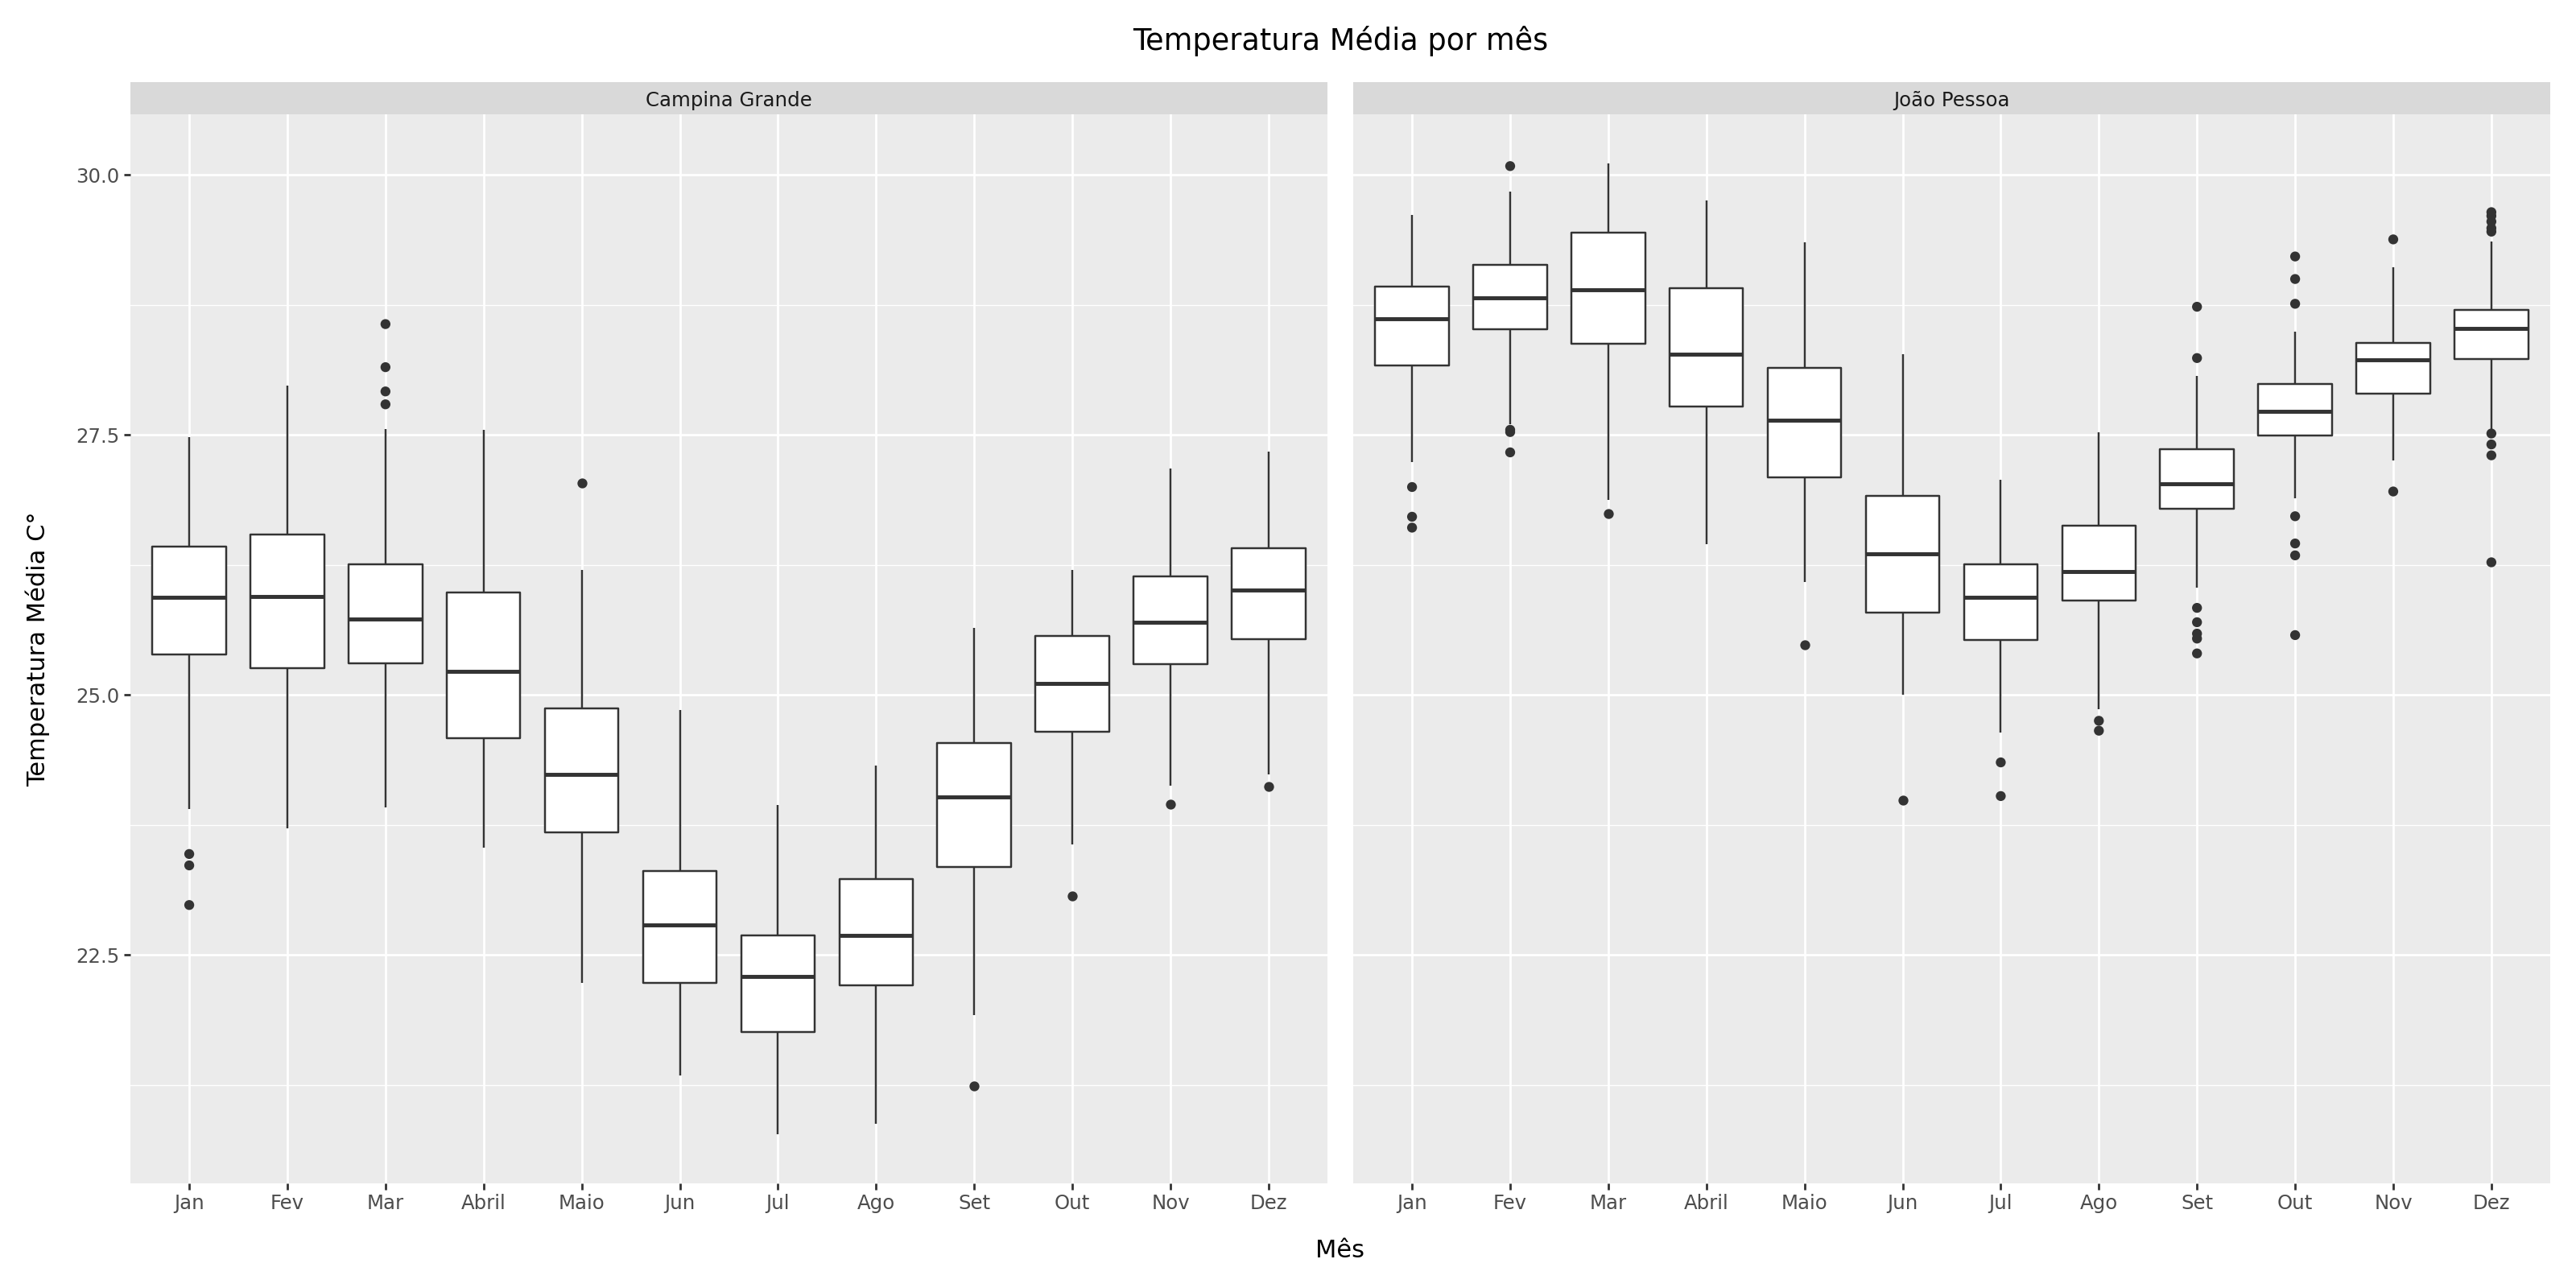

In [110]:

(plotnine.ggplot(clima_data) + 
     plotnine.aes(x='mes_nome',y='tmedia') + 
     plotnine.geom_boxplot() + 
     plotnine.xlab("Mês") + 
     plotnine.ylab("Temperatura Média C°") +
     plotnine.ggtitle("Temperatura Média por mês") + 
     plotnine.scale_x_discrete(limits=meses) + 
     plotnine.facet_wrap("cidade") + 
     plotnine.theme(figure_size=(16, 8))
    )


Como é possível observar pela tabela e nos boxplots divididos por mês os meses mais frios são os meses de julho, junho e agosto, já os mais quentes são os meses de março para joão pessoa e de fevereiro para campina grande.

Sobre a temperatura dorante as festas juninas, como é possível observar nos boxplots divididos por mês, para as cidades de campina grande e joão pessoa, o mês de junho referente as festas juninas são meses com temperaturas baixas em relação ao resto do ano, bem próximas das temperaturas mais baixas que normalmente se encontram em julho. 

Com média de 22.84° (abaixo da média geral de 24.69°) para campina grande e 26.36° (que também está abaixo da média geral de joão pessoa que é de 27.65°) para João Pessoa.

### Q3: Quanto chove por semana em JP e CG? Descreva a distribuição do volume de chuvas para as cidades?

Em campina grande chove em média 13.99 mm de chuva por semana com um desvio padrão de 21.65. Já em João pessoa chove em média 32.64 mm com um desvio padrão de 44.47.

In [108]:
clima_data.groupby(["cidade"])["chuva"].describe()


,count,mean,std,min,25%,50%,75%,max
cidade,,,,,,,,
Campina Grande,1224.0,13.997304,21.651737,0.0,0.4,4.9,18.65,191.9
João Pessoa,1524.0,32.648491,44.470097,0.0,3.0,14.1,46.40,351.6


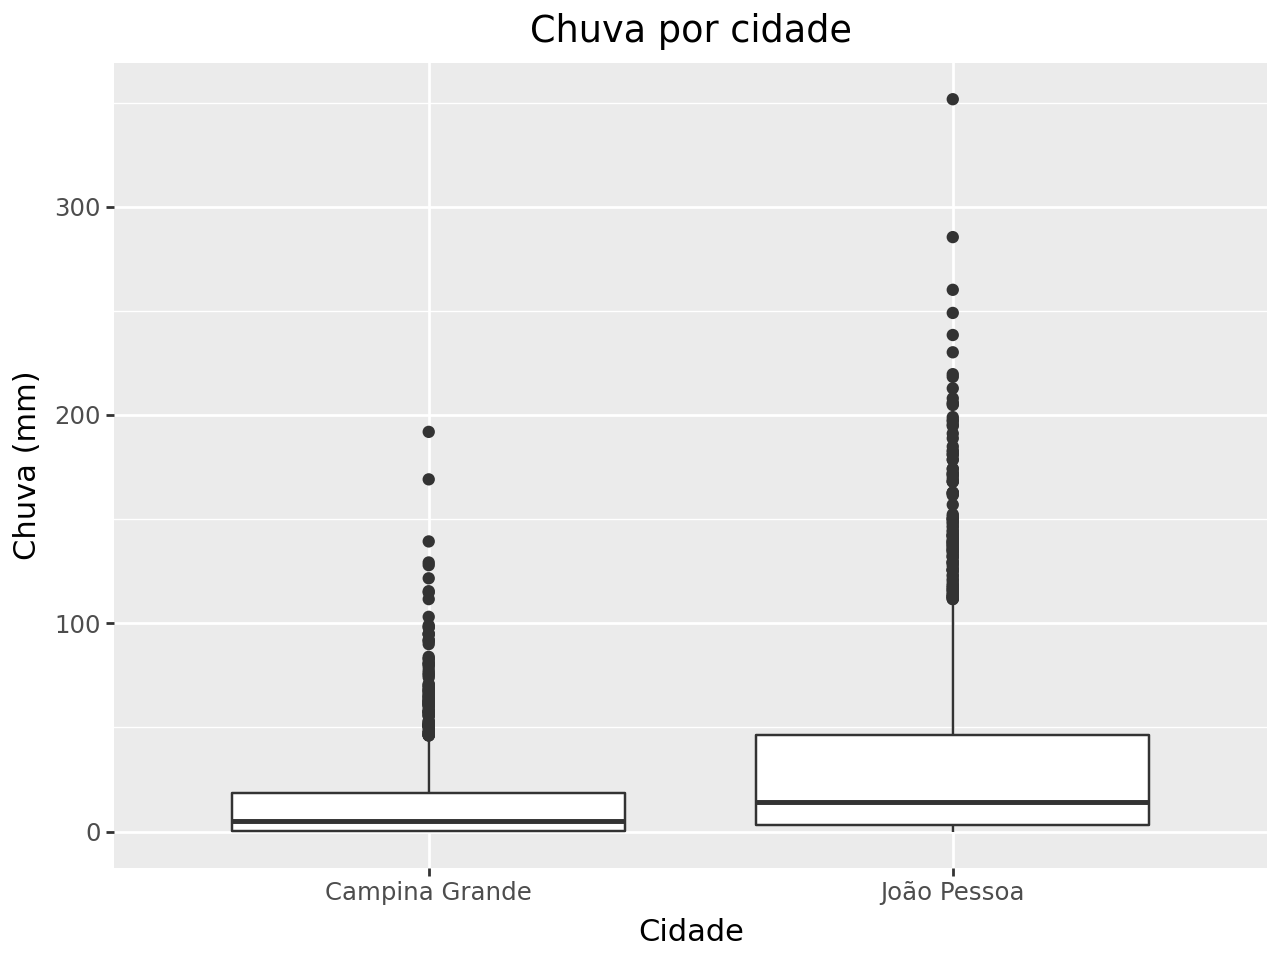

In [116]:
(plotnine.ggplot(clima_data) + 
     plotnine.aes(x='cidade',y='chuva') + 
     plotnine.geom_boxplot() + 
     plotnine.xlab("Cidade") + 
     plotnine.ylab("Chuva (mm)") +
     plotnine.ggtitle("Chuva por cidade") 
    )

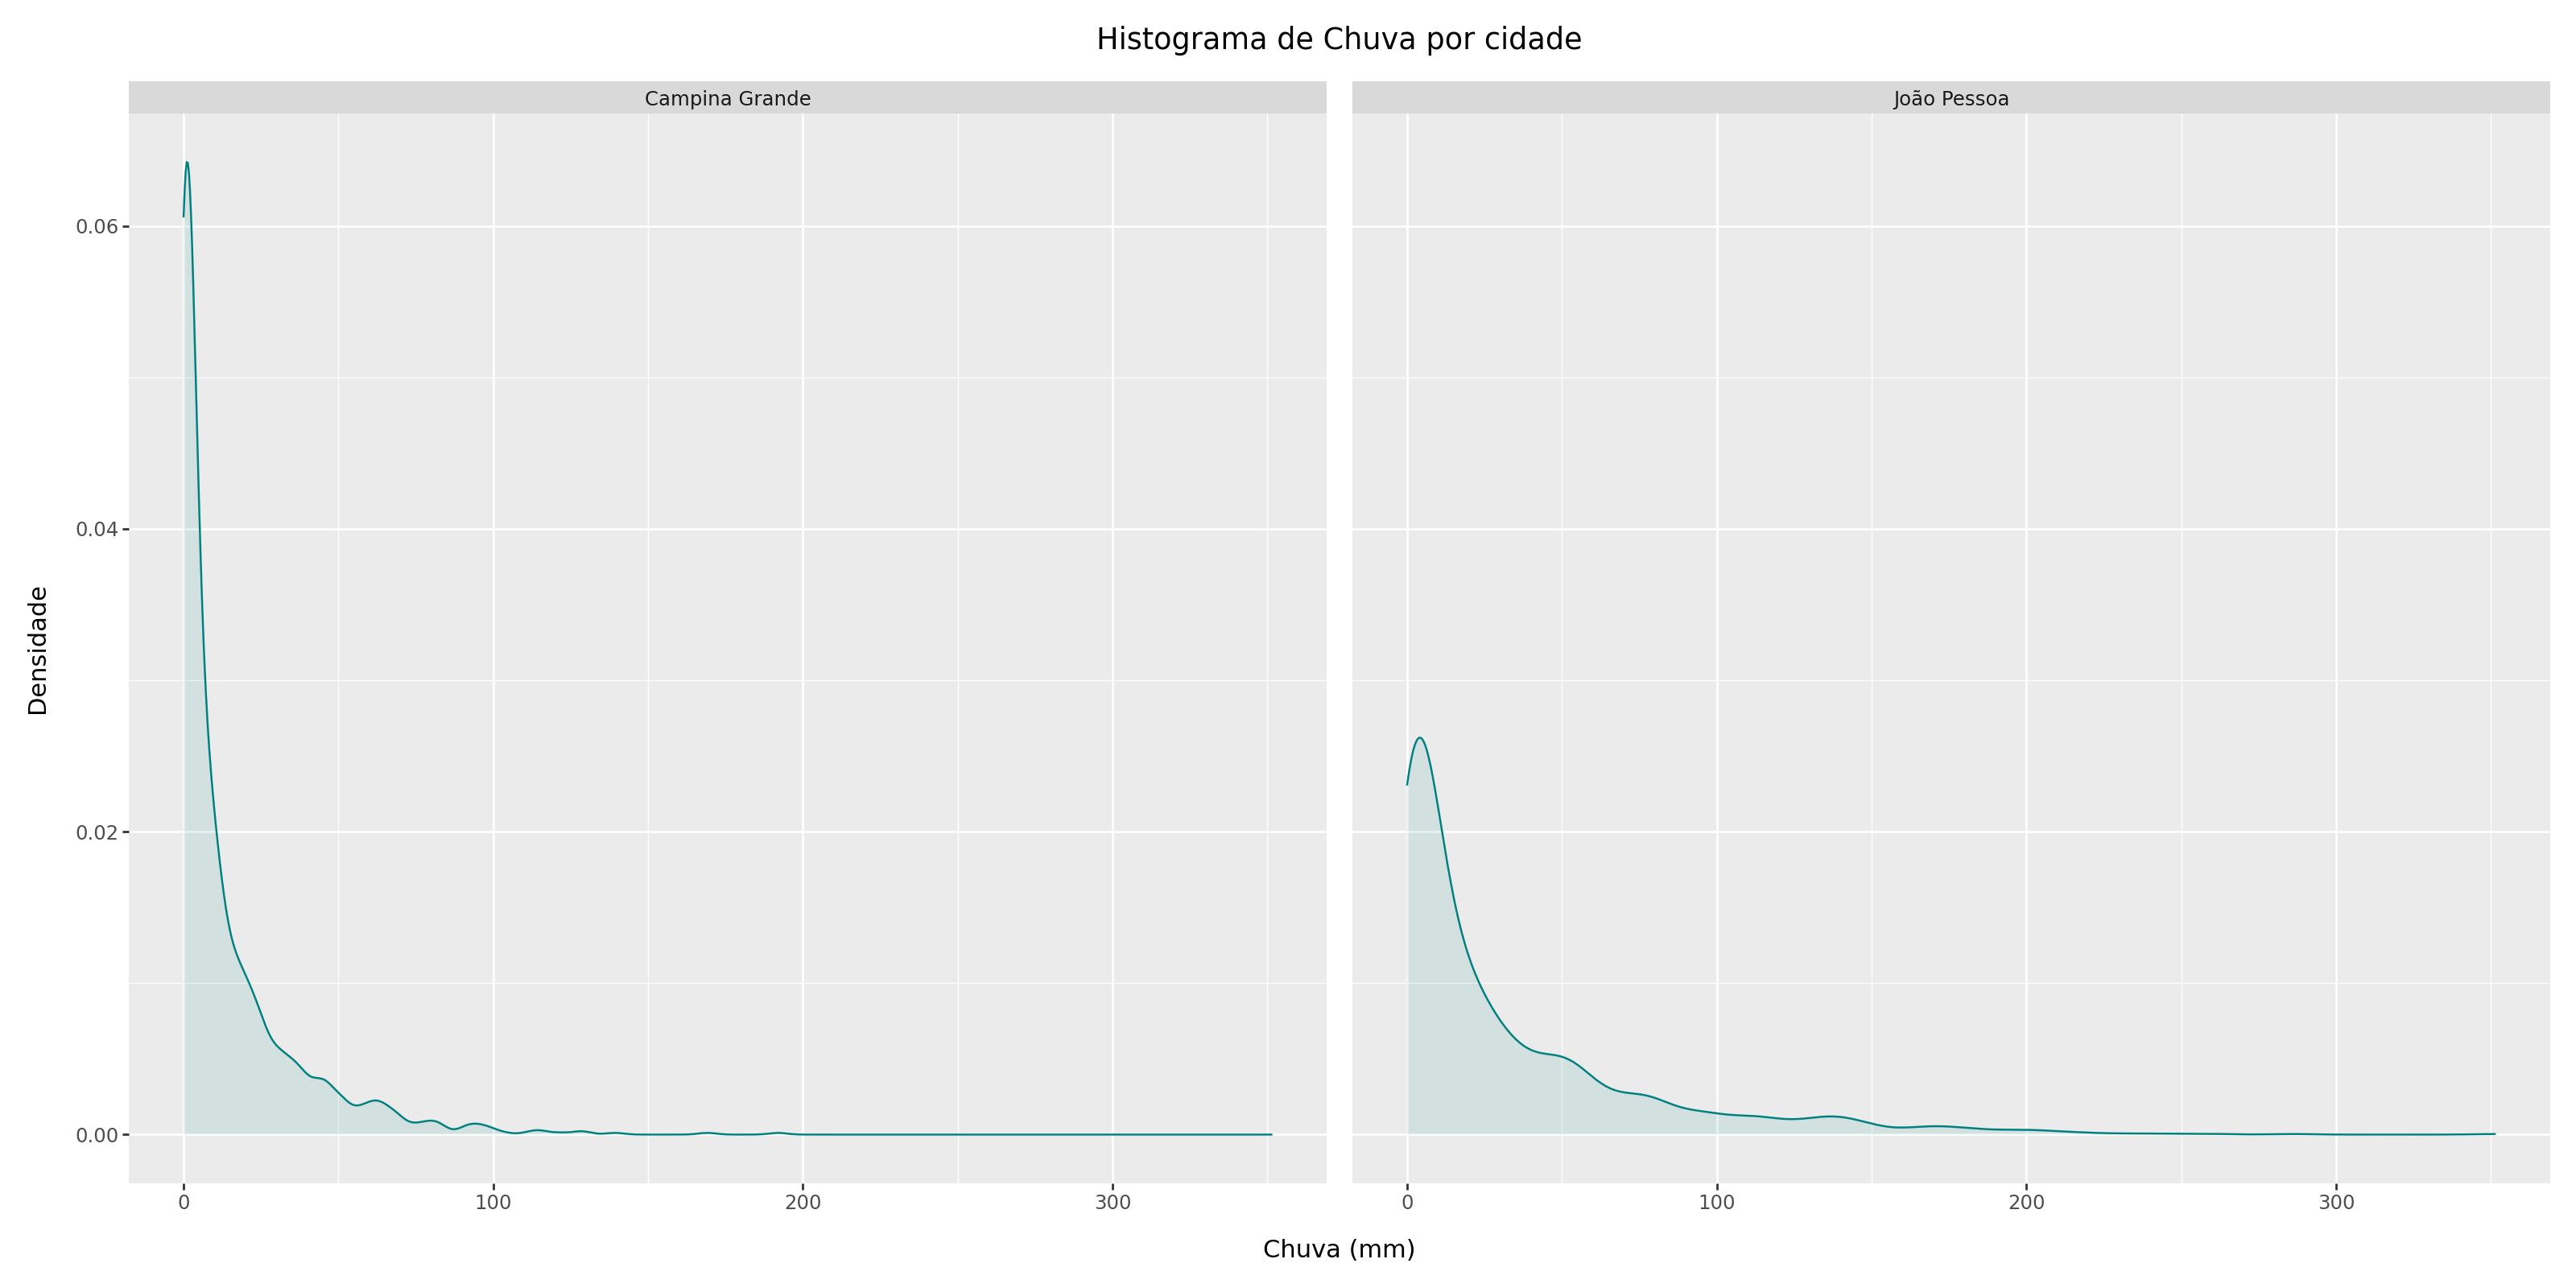

In [111]:

(
    plotnine.ggplot(clima_data) + 
     plotnine.aes(x='chuva') + 
     plotnine.geom_density(fill="teal", color = "teal", alpha = .1) + 
     plotnine.xlab("Chuva (mm)") + 
     plotnine.ylab("Densidade") +
     plotnine.ggtitle("Histograma de Chuva por cidade") + 
     plotnine.facet_wrap("cidade") + 
     plotnine.theme(figure_size=(16, 8))
)


Analisando os bloxplots e o histograma das chuvas da cidade de campina grande, é possível notar que existem mais ocorrências de poucas ou zero chuvas em campina grande. Com uma calda longa a direita, já  em joão pessoa existem mais ocorrências de chuva com mais milímetros de chuva, tendo as medianas em 4.9mm para campina grande e 14.1mm para joão pessoa.

### Q4: Qual a relação entre a temperatura de uma semana e a temperatura da semana anterior (descreva para as duas cidades)?
Verificando o gráfico de dispersão parece haver uma correlação entre a quantidade de chuva de uma semana com a quantidade de chuva da semana anterior.
Fazendo o cálculo do  coeficiente de correlação de pearson como é possível observar nas tabelas, obtemos as seguintes correlações:

Para as duas cidades: 0.941556.

Para João pessoa: 0.859407.

Para campina grande: 0.880168.

Que são 3 correlações bem altas para as variáveis de temperatura de uma semana com a semana interior independente das duas cidades analisadas ou se analisamos as duas cidades separadas.

C:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


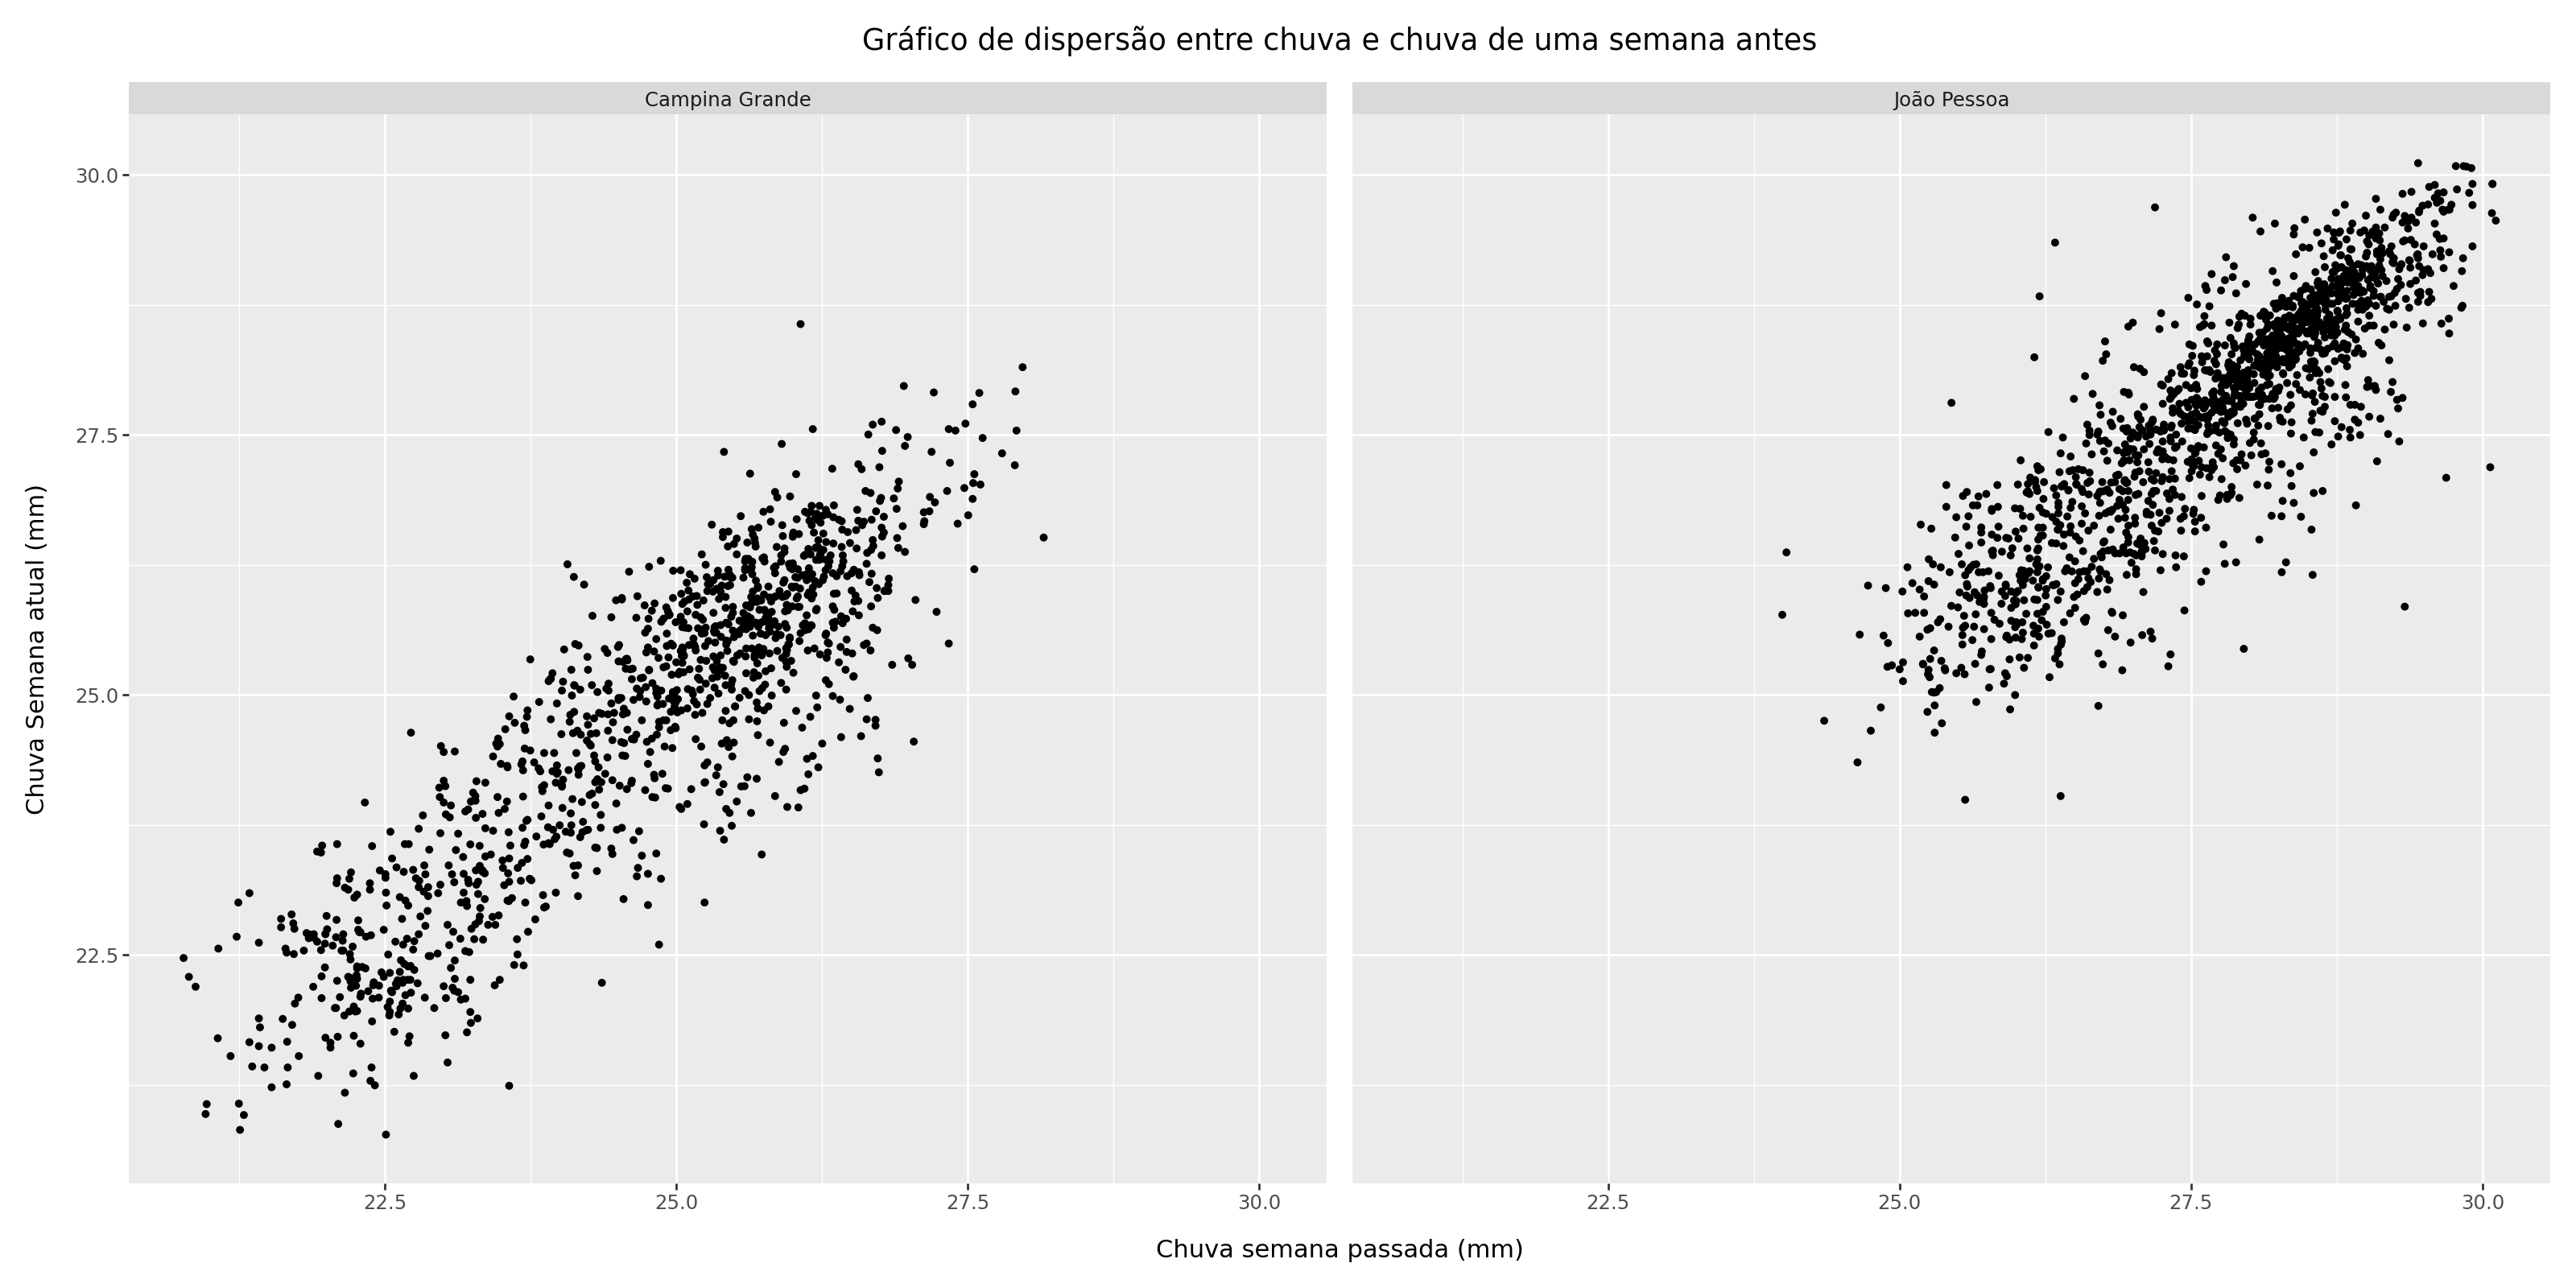

In [140]:
(
 plotnine.ggplot(clima_data) + 
 plotnine.aes(x='tmedia_lag',y='tmedia') + 
 plotnine.geom_point(size = 1) + 
 plotnine.xlab("Chuva semana passada (mm)") + 
 plotnine.ylab("Chuva Semana atual (mm)") +
 plotnine.ggtitle("Gráfico de dispersão entre chuva e chuva de uma semana antes") +
 plotnine.facet_wrap("cidade") + 
 plotnine.theme(figure_size=(16, 8))
)

In [146]:
print("Correlação de Pearson para as duas cidades: ")
clima_data.corr(method='pearson', min_periods=1, numeric_only=True)

Correlação de Pearson para as duas cidades: 


,tmedia,tmax,tmin,chuva,mes,ano,tmedia_lag
tmedia,1.000000,0.681985,0.880656,-0.067288,-0.126898,-0.085370,0.941556
tmax,0.681985,1.000000,0.511931,-0.177747,-0.172825,0.138471,0.648257
tmin,0.880656,0.511931,1.000000,0.035662,-0.130828,-0.098740,0.863920
chuva,-0.067288,-0.177747,0.035662,1.000000,-0.198886,-0.009030,0.069263
mes,-0.126898,-0.172825,-0.130828,-0.198886,1.000000,-0.011956,-0.159084
ano,-0.085370,0.138471,-0.098740,-0.009030,-0.011956,1.000000,-0.086789
tmedia_lag,0.941556,0.648257,0.863920,0.069263,-0.159084,-0.086789,1.000000


In [143]:
print("Correlação de Pearson para João pessoa: ")
clima_jp.corr(method='pearson', min_periods=1, numeric_only=True)

Correlação de Pearson para João pessoa: 


,tmedia,tmax,tmin,chuva,mes,ano,tmedia_lag
tmedia,1.000000,0.853368,0.702424,-0.441131,-0.257072,0.173375,0.859407
tmax,0.853368,1.000000,0.589780,-0.180482,-0.337776,0.439973,0.836891
tmin,0.702424,0.589780,1.000000,-0.273404,-0.116078,0.096649,0.642787
chuva,-0.441131,-0.180482,-0.273404,1.000000,-0.215255,0.035861,-0.197761
mes,-0.257072,-0.337776,-0.116078,-0.215255,1.000000,-0.021141,-0.303870
ano,0.173375,0.439973,0.096649,0.035861,-0.021141,1.000000,0.172408
tmedia_lag,0.859407,0.836891,0.642787,-0.197761,-0.303870,0.172408,1.000000


In [147]:
print("Correlação de Pearson para Campina grande: ")
clima_cg.corr(method='pearson', min_periods=1, numeric_only=True)

Correlação de Pearson para Campina grande: 


,tmedia,tmax,tmin,chuva,mes,ano,tmedia_lag
tmedia,1.000000,0.935814,0.809086,-0.395831,-0.152011,-0.103524,0.880168
tmax,0.935814,1.000000,0.728761,-0.376566,-0.083172,-0.037803,0.868741
tmin,0.809086,0.728761,1.000000,-0.092451,-0.321344,-0.104618,0.795904
chuva,-0.395831,-0.376566,-0.092451,1.000000,-0.232411,0.018510,-0.187459
mes,-0.152011,-0.083172,-0.321344,-0.232411,1.000000,0.005655,-0.203198
ano,-0.103524,-0.037803,-0.104618,0.018510,0.005655,1.000000,-0.105278
tmedia_lag,0.880168,0.868741,0.795904,-0.187459,-0.203198,-0.105278,1.000000


### Q5: Qual a relação entre temperatura e chuvas nas semanas em que choveu (descreva para as duas cidades)?


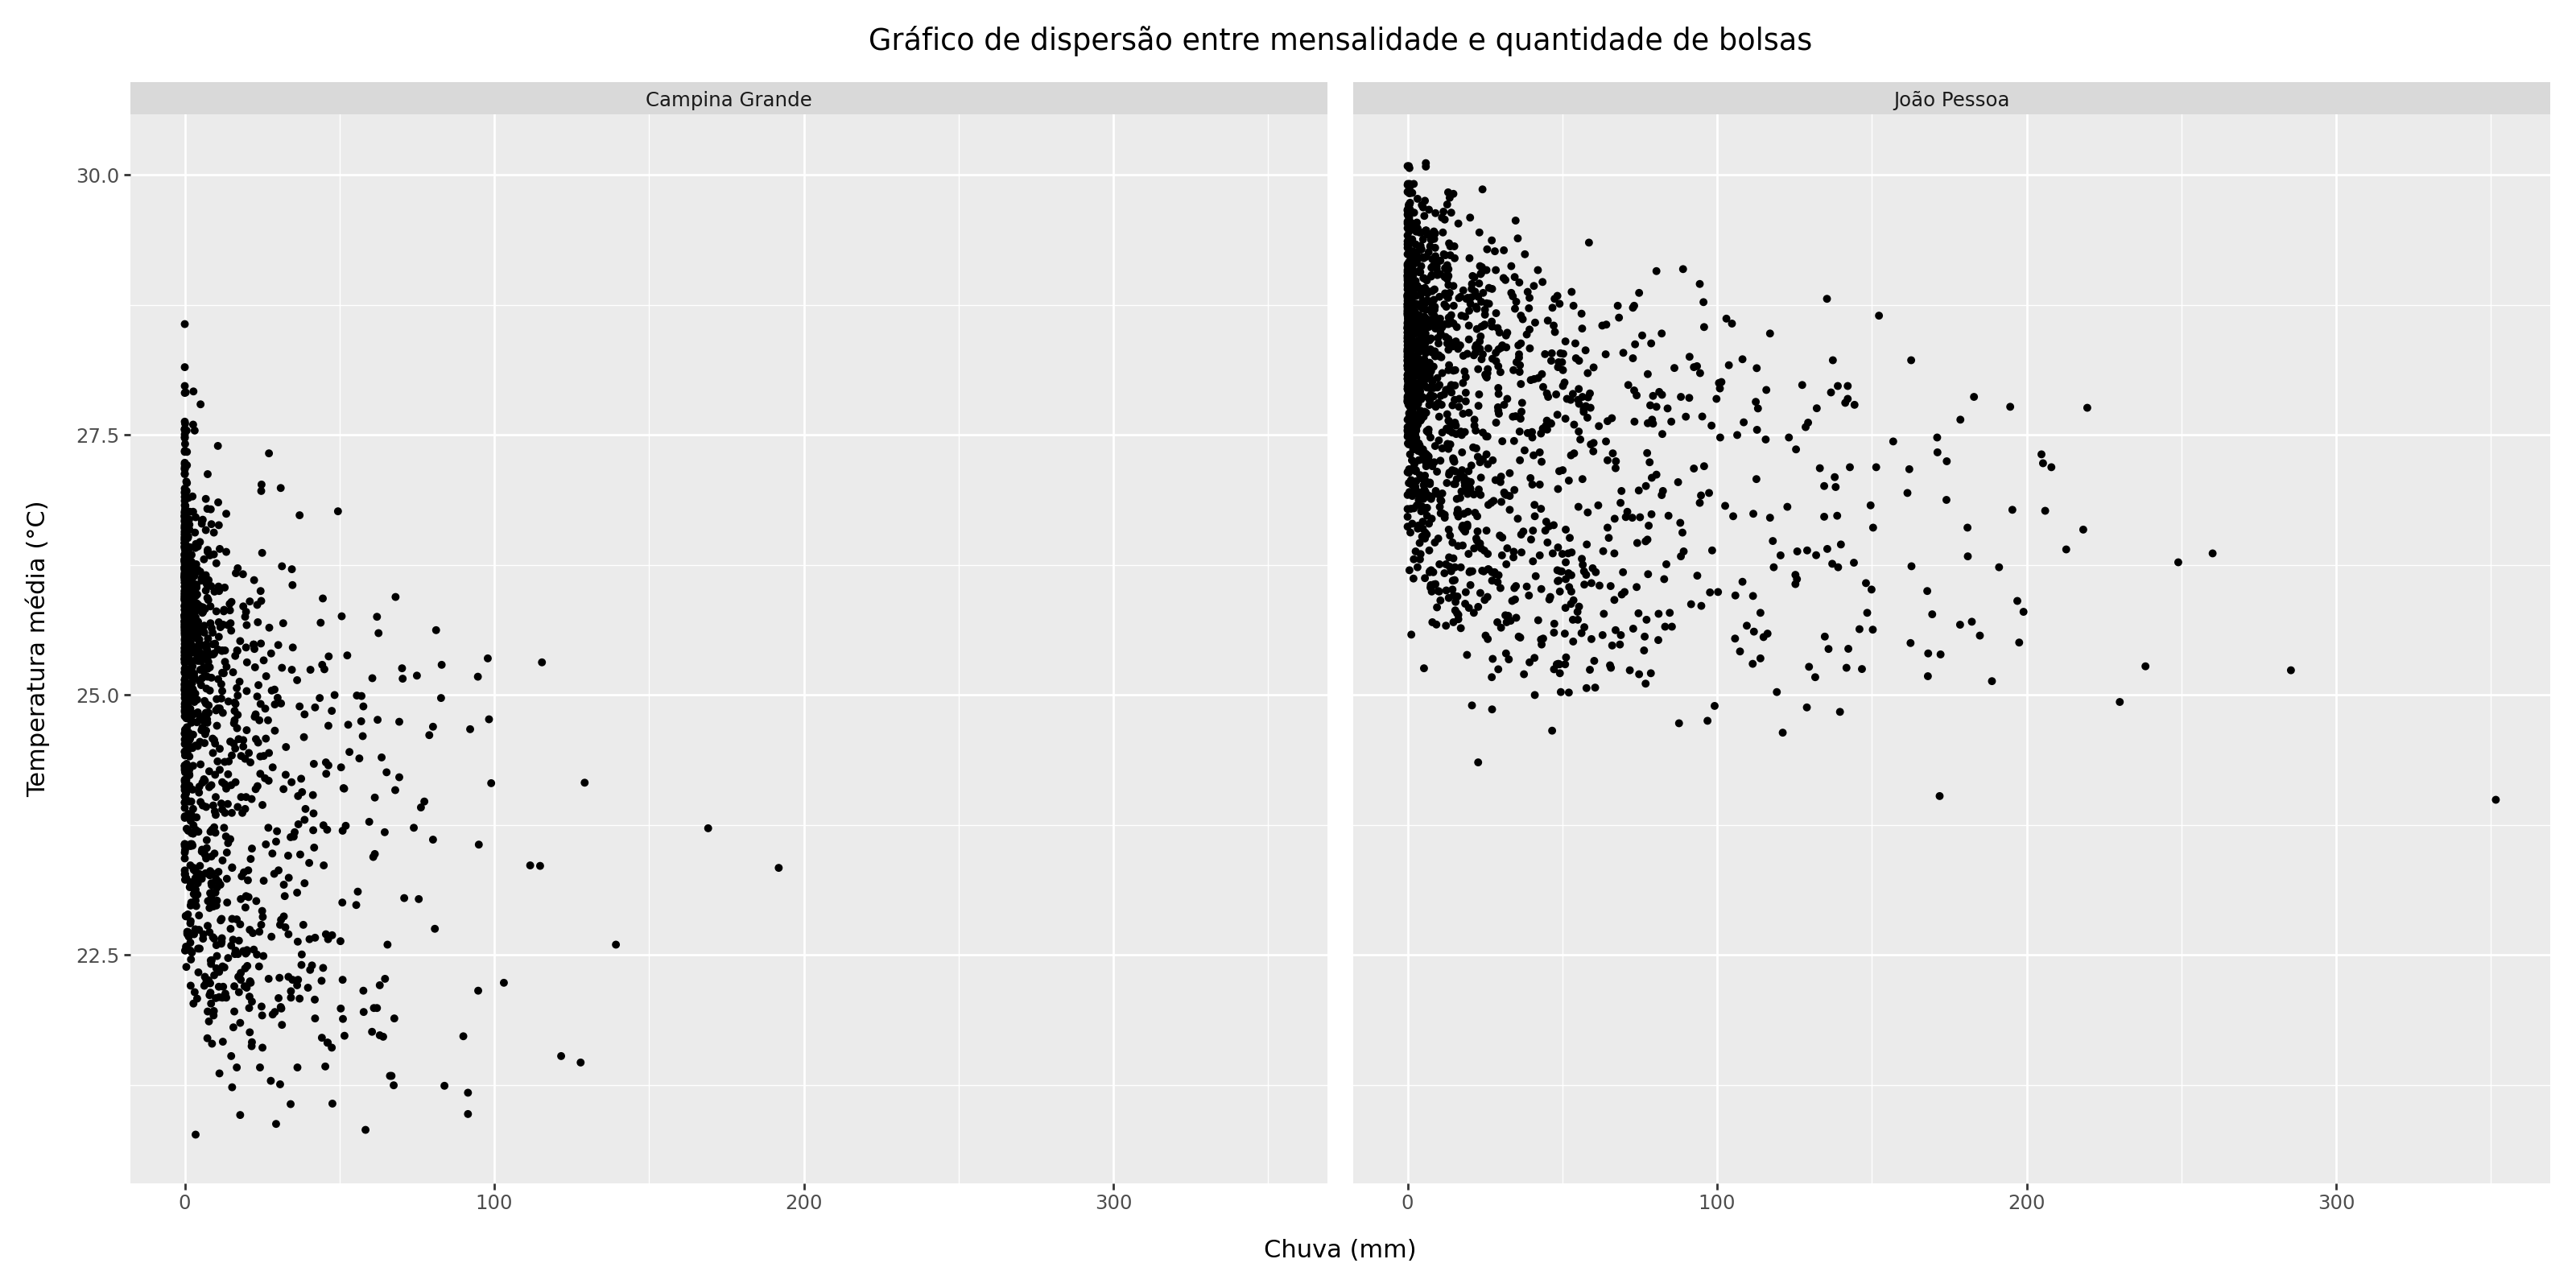

In [151]:
(
 plotnine.ggplot(clima_data) + 
 plotnine.aes(x='chuva',y='tmedia') + 
 plotnine.geom_point(size = 1) + 
 plotnine.xlab("Chuva (mm)") + 
 plotnine.ylab("Temperatura média (°C)") +
 plotnine.ggtitle("Gráfico de dispersão entre mensalidade e quantidade de bolsas") +
 plotnine.facet_wrap("cidade") + 
 plotnine.theme(figure_size=(16, 8))
)

In [129]:
print("Correlação de Pearson para as duas cidades: ")
print(clima_data.corr(method='pearson', min_periods=1, numeric_only=True))
print("Correlação de Spearman para as duas cidades")
print(clima_data.corr(method='spearman', min_periods=1, numeric_only=True))
print("Correlação de kendall para as duas cidades")
print(clima_data.corr(method='kendall', min_periods=1, numeric_only=True))

Correlação de Pearson: 
          tmedia      tmax      tmin     chuva       mes       ano
tmedia  1.000000  0.681985  0.880656 -0.067288 -0.126898 -0.085370
tmax    0.681985  1.000000  0.511931 -0.177747 -0.172825  0.138471
tmin    0.880656  0.511931  1.000000  0.035662 -0.130828 -0.098740
chuva  -0.067288 -0.177747  0.035662  1.000000 -0.198886 -0.009030
mes    -0.126898 -0.172825 -0.130828 -0.198886  1.000000 -0.011956
ano    -0.085370  0.138471 -0.098740 -0.009030 -0.011956  1.000000
Correlação de Spearman
          tmedia      tmax      tmin     chuva       mes       ano
tmedia  1.000000  0.572981  0.883026 -0.119777 -0.132239 -0.070047
tmax    0.572981  1.000000  0.426619 -0.356148 -0.194800  0.184849
tmin    0.883026  0.426619  1.000000  0.024038 -0.144749 -0.098668
chuva  -0.119777 -0.356148  0.024038  1.000000 -0.265576 -0.021624
mes    -0.132239 -0.194800 -0.144749 -0.265576  1.000000 -0.013176
ano    -0.070047  0.184849 -0.098668 -0.021624 -0.013176  1.000000
Correlação de k

In [130]:
print("Correlação de Pearson para João pessoa: ")
print(clima_jp.corr(method='pearson', min_periods=1, numeric_only=True))
print("Correlação de Spearman para as duas cidades")
print(clima_jp.corr(method='spearman', min_periods=1, numeric_only=True))
print("Correlação de kendall para as duas cidades")
print(clima_jp.corr(method='kendall', min_periods=1, numeric_only=True))

Correlação de Pearson para João pessoa: 
          tmedia      tmax      tmin     chuva       mes       ano
tmedia  1.000000  0.853368  0.702424 -0.441131 -0.257072  0.173375
tmax    0.853368  1.000000  0.589780 -0.180482 -0.337776  0.439973
tmin    0.702424  0.589780  1.000000 -0.273404 -0.116078  0.096649
chuva  -0.441131 -0.180482 -0.273404  1.000000 -0.215255  0.035861
mes    -0.257072 -0.337776 -0.116078 -0.215255  1.000000 -0.021141
ano     0.173375  0.439973  0.096649  0.035861 -0.021141  1.000000
Correlação de Spearman para as duas cidades
          tmedia      tmax      tmin     chuva       mes       ano
tmedia  1.000000  0.862113  0.716501 -0.483638 -0.281363  0.176415
tmax    0.862113  1.000000  0.620661 -0.244351 -0.350956  0.425294
tmin    0.716501  0.620661  1.000000 -0.372886 -0.135826  0.101502
chuva  -0.483638 -0.244351 -0.372886  1.000000 -0.282456  0.020817
mes    -0.281363 -0.350956 -0.135826 -0.282456  1.000000 -0.022580
ano     0.176415  0.425294  0.101502  0.0208

In [133]:
print("Correlação de Pearson para Campina grande: ")
print(clima_cg.corr(method='pearson', min_periods=1, numeric_only=True))
print("Correlação de Spearman para as duas cidades")
print(clima_cg.corr(method='spearman', min_periods=1, numeric_only=True))
print("Correlação de kendall para as duas cidades")
print(clima_cg.corr(method='kendall', min_periods=1, numeric_only=True))

Correlação de Pearson para Campina grande: 
          tmedia      tmax      tmin     chuva       mes       ano
tmedia  1.000000  0.935814  0.809086 -0.395831 -0.152011 -0.103524
tmax    0.935814  1.000000  0.728761 -0.376566 -0.083172 -0.037803
tmin    0.809086  0.728761  1.000000 -0.092451 -0.321344 -0.104618
chuva  -0.395831 -0.376566 -0.092451  1.000000 -0.232411  0.018510
mes    -0.152011 -0.083172 -0.321344 -0.232411  1.000000  0.005655
ano    -0.103524 -0.037803 -0.104618  0.018510  0.005655  1.000000
Correlação de Spearman para as duas cidades
          tmedia      tmax      tmin     chuva       mes       ano
tmedia  1.000000  0.925133  0.787370 -0.540997 -0.154663 -0.106995
tmax    0.925133  1.000000  0.699153 -0.522827 -0.089832 -0.033391
tmin    0.787370  0.699153  1.000000 -0.168991 -0.354507 -0.111807
chuva  -0.540997 -0.522827 -0.168991  1.000000 -0.277777  0.006965
mes    -0.154663 -0.089832 -0.354507 -0.277777  1.000000  0.004106
ano    -0.106995 -0.033391 -0.111807  0.0

É possível notar que a correlação entre temperatura média e chuva é de -0.12 para correlação de pearson, -0.11 para a correlação de spearman e -0.07 para kendall, o que significa que é uma correlação extremamente baixa.

Já para especificamente joão pessoa, -0.44 para a correlação de spearman, -0.48 para a correlação de spearman e -0.32 para a correlação de kendall. Que também são baixas.

O mesmo ocorre para Campina grande, -0.39 para a correlação de spearman, -0.54 para a correlação de spearman e -0.37 para a correlação de kendall. Que também são baixas.

Ou seja, tanto observando os gráficos de dispersão entre temperatura média e chuva a correlação entre as duas variáveis é bem baixa independente do método de correlação, da cidade e se estamos analisando as duas cidades juntas. 